In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 0. Compare with/without using cutting threshold

In [49]:
df = pd.read_csv('./result0.csv')
df2 = pd.read_csv('./result1.csv')

df = df[df["matrix dimension"] <= 500]
df2 = df2[df2["matrix dimension"] <= 500]

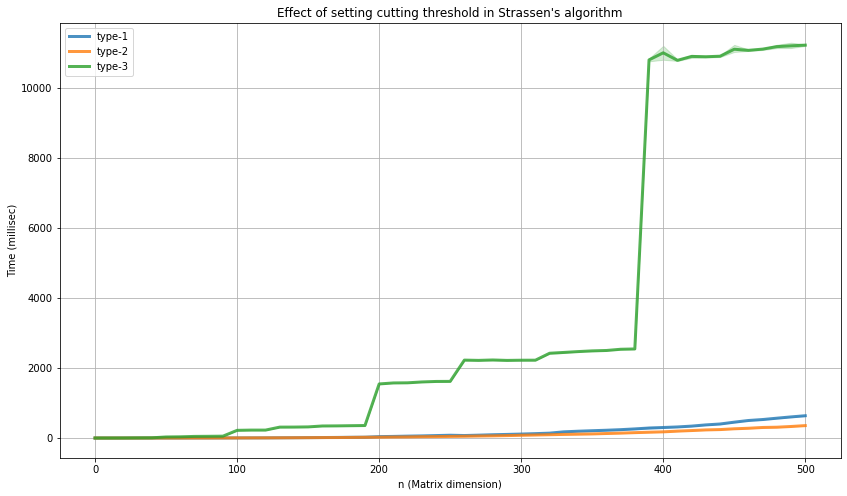

In [50]:
ax = plt.figure(figsize=(14,8))

sns.lineplot(x="matrix dimension", y="Standard", data=df, label="type-1", linewidth=3, alpha=0.8)
sns.lineplot(x="matrix dimension", y="Strassen", data=df2, label="type-2", linewidth=3, alpha=0.8)
sns.lineplot(x="matrix dimension", y="Strassen", data=df, label="type-3", linewidth=3, alpha=0.8)

plt.legend()
plt.title("Effect of setting cutting threshold in Strassen's algorithm")
plt.xlabel("n (Matrix dimension)")
plt.ylabel("Time (millisec)")
plt.grid()
plt.show()

# 1. Strassen algorithm VS standard matrix multiplication

In [43]:
df = pd.read_csv('./result1.csv')
df['n_3'] = df['matrix dimension']**3 / 2e5
df['n_log'] = df['matrix dimension']**(np.log2(7)) / 1e5

In [44]:
df2 = pd.read_csv('./result2.csv')
df['Strassen1'] = df2['Strassen']
df

,matrix dimension,Strassen,Standard,n_3,n_log,Strassen1
0,0,0,0,0.000,0.000000,0
1,0,0,0,0.000,0.000000,0
2,0,0,0,0.000,0.000000,0
3,0,0,0,0.000,0.000000,0
4,0,0,0,0.000,0.000000,0
...,...,...,...,...,...,...
495,990,2835,6480,4851.495,2569.278651,916
496,990,2732,6577,4851.495,2569.278651,1022
497,990,2742,6563,4851.495,2569.278651,941
498,990,2727,6406,4851.495,2569.278651,968


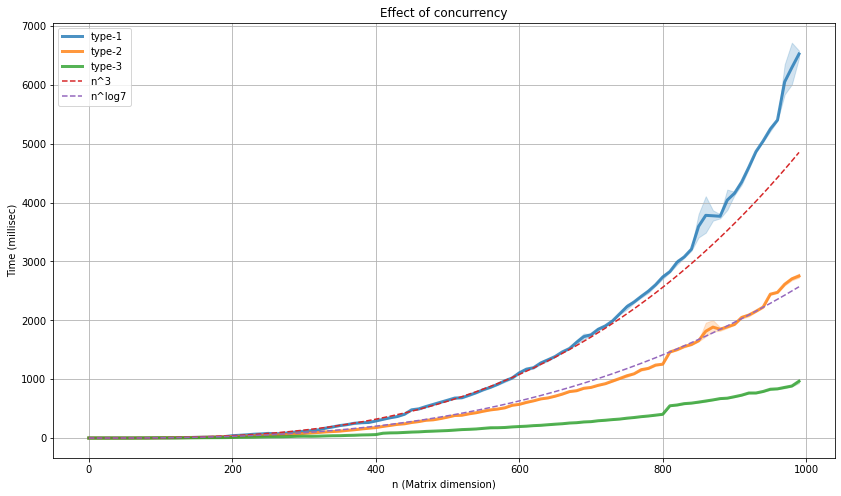

In [46]:
ax = plt.figure(figsize=(14,8))

sns.lineplot(x="matrix dimension", y="Standard", data=df, label="type-1", linewidth=3, alpha=0.8)
sns.lineplot(x="matrix dimension", y="Strassen", data=df, label="type-2", linewidth=3, alpha=0.8)
sns.lineplot(x="matrix dimension", y="Strassen1", data=df, label="type-3", linewidth=3, alpha=0.8)

plt.plot(df["matrix dimension"], df["n_3"], label="n^3", linestyle='--', alpha=0.8)
plt.plot(df["matrix dimension"], df["n_log"], label="n^log7", linestyle='--', alpha=0.8)

plt.legend()
plt.title("Effect of concurrency")
plt.xlabel("n (Matrix dimension)")
plt.ylabel("Time (millisec)")
plt.grid()
plt.show()

# 2. BLAS3-A test

In [51]:
df = pd.read_csv('./result3.csv')
df['n_3'] = df['matrix dimension']**3 / 2e5
df['n_log'] = df['matrix dimension']**(np.log2(7)) / 1e5

In [52]:
df2 = pd.read_csv('./result2.csv')
df['Strassen1'] = df2['Strassen']
df

,matrix dimension,Strassen,Standard,n_3,n_log,Strassen1
0,0,0,0,0.000,0.000000,0
1,0,0,0,0.000,0.000000,0
2,0,0,0,0.000,0.000000,0
3,0,0,0,0.000,0.000000,0
4,0,0,0,0.000,0.000000,0
...,...,...,...,...,...,...
495,990,2845,7964,4851.495,2569.278651,916
496,990,2859,6995,4851.495,2569.278651,1022
497,990,3004,10883,4851.495,2569.278651,941
498,990,2821,9321,4851.495,2569.278651,968


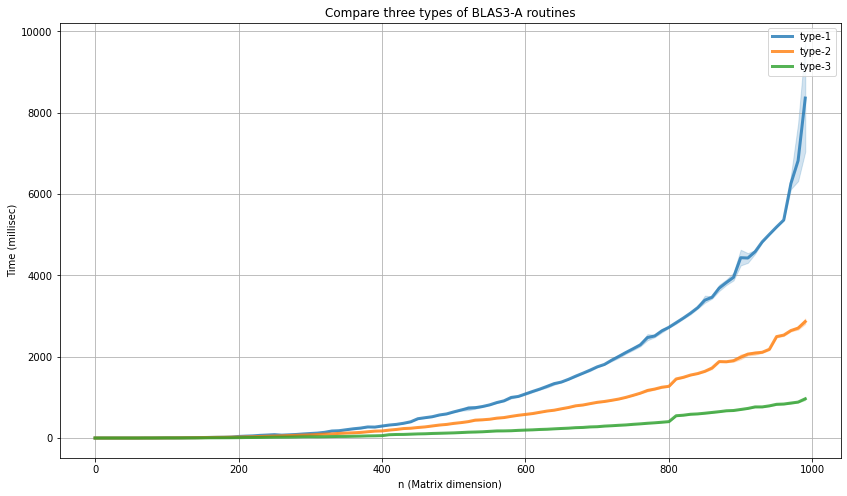

In [53]:
ax = plt.figure(figsize=(14,8))

sns.lineplot(x="matrix dimension", y="Standard", data=df, label="type-1", linewidth=3, alpha=0.8)
sns.lineplot(x="matrix dimension", y="Strassen", data=df, label="type-2", linewidth=3, alpha=0.8)
sns.lineplot(x="matrix dimension", y="Strassen1", data=df, label="type-3", linewidth=3, alpha=0.8)

plt.legend()
plt.title("Compare three types of BLAS3-A routines")
plt.xlabel("n (Matrix dimension)")
plt.ylabel("Time (millisec)")
plt.grid()
plt.show()

# 3. BLA3-D test

In [58]:
df = pd.read_csv('./result5.csv')
df['n_3'] = df['matrix dimension']**3 / 2e5
df['n_log'] = df['matrix dimension']**(np.log2(7)) / 1e5

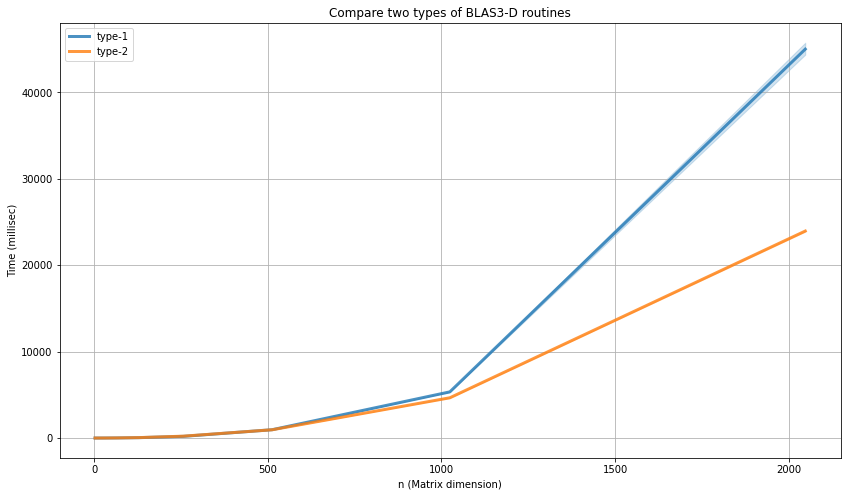

In [59]:
ax = plt.figure(figsize=(14,8))

sns.lineplot(x="matrix dimension", y="Standard", data=df, label="type-1", linewidth=3, alpha=0.8)
sns.lineplot(x="matrix dimension", y="Strassen", data=df, label="type-2", linewidth=3, alpha=0.8)

plt.legend()
plt.title("Compare two types of BLAS3-D routines")
plt.xlabel("n (Matrix dimension)")
plt.ylabel("Time (millisec)")
plt.grid()
plt.show()

## Compare theoretical asymptotic bound with coefficients

In [5]:
x = np.linspace(0,80,81)
y1 = 4.7*x**(2.8)
y2 = 2*x**(3)

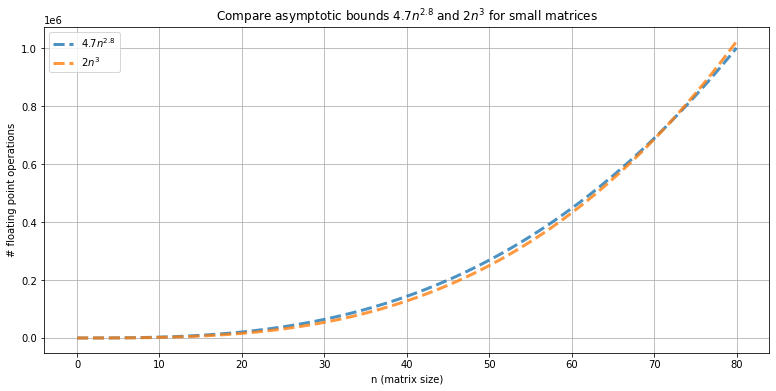

In [10]:
ax = plt.figure(figsize=(13,6))
plt.plot(y1, linestyle='--', label='$4.7n^{2.8}$', linewidth=3, alpha=0.8)
plt.plot(y2, linestyle='--', label='$2n^{3}$', linewidth=3, alpha=0.8)
plt.legend()
plt.title("Compare asymptotic bounds $4.7n^{2.8}$ and $2n^{3}$ for small matrices")
plt.xlabel("n (matrix size)")
plt.ylabel("# floating point operations")
plt.grid()
plt.show()